In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/Customers_Data.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df=data.drop(['CustomerID'],axis=1)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df.isna().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


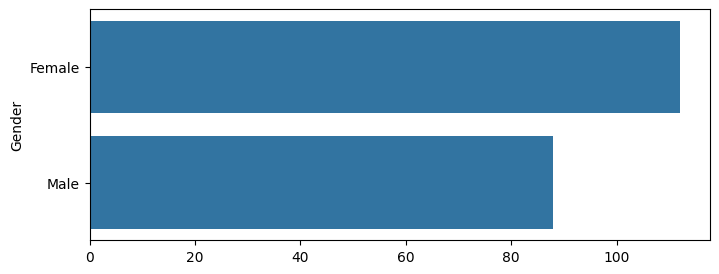

Gender
Female    112
Male       88
Name: count, dtype: int64


In [7]:
#Count of customers and visualization using a Bar Graph
gender=df.Gender.value_counts()
#sns.set_style("darkgrid")
plt.figure(figsize=(8,3))
sns.barplot(x=gender.values,y=gender.index)
plt.show()
print(gender)

In [8]:
df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [9]:
df['Age'].max()

70

In [10]:
df['Age'].min()

18

In [11]:
age18_25=df.Age[(df.Age<=25)&(df.Age>=18)]
age26_35=df.Age[(df.Age<=35)&(df.Age>=26)]
age36_45=df.Age[(df.Age<=45)&(df.Age>=36)]
age46_55=df.Age[(df.Age<=55)&(df.Age>=46)]
age56andabove=df.Age[(df.Age>=56)]

In [12]:
x=["18-25","26-35","36-45","46-55","56+"]

In [13]:
y=[len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age56andabove.values)]

In [14]:
print(y) #there are 38 customers who are in between the age 18-25
         #there are 60 customers who are in between the age 26 to 35 and so on...

[38, 60, 36, 37, 29]


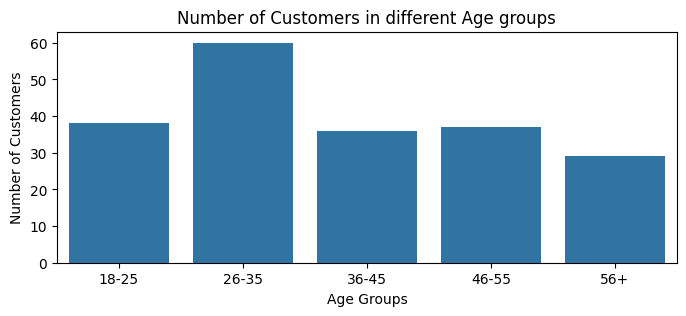

In [15]:
plt.figure(figsize=(8,3))
sns.barplot(x=x,y=y)
plt.title("Number of Customers in different Age groups")
plt.xlabel("Age Groups")
plt.ylabel("Number of Customers")
plt.show()

In [16]:
#Creating groups of customers based on Spending Score
ss1_20=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1)&(df["Spending Score (1-100)"]<=20)]
ss21_40=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21)&(df["Spending Score (1-100)"]<=40)]
ss41_60=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41)&(df["Spending Score (1-100)"]<=60)]
ss61_80=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61)&(df["Spending Score (1-100)"]<=80)]
ss81_100=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81)&(df["Spending Score (1-100)"]<=100)]

In [17]:
x=["1-20","21-40","41-60","61-80","81-100"]
y=[len(ss1_20.values),len(ss21_40.values),len(ss41_60.values),len(ss61_80.values),len(ss81_100.values)]

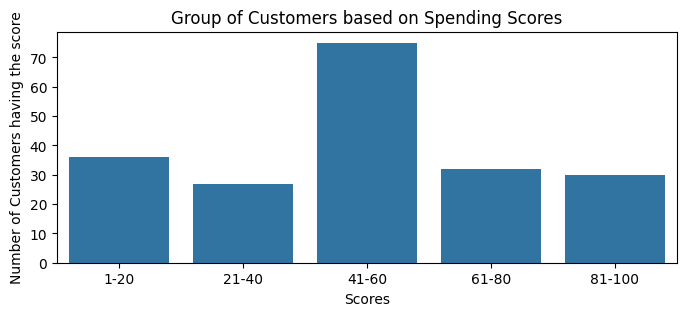

In [18]:
plt.figure(figsize=(8,3))
sns.barplot(x=x,y=y)
plt.title("Group of Customers based on Spending Scores")
plt.xlabel("Scores")
plt.ylabel("Number of Customers having the score")
plt.show()

In [19]:
#Creating customer groups based on Annual Income (k$)
df['Annual Income (k$)'].max()

137

In [20]:
df['Annual Income (k$)'].min()

15

In [21]:
ai0_30=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0) & (df["Annual Income (k$)"]<=30)]
ai31_60=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31) & (df["Annual Income (k$)"]<=60)]
ai61_90=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61) & (df["Annual Income (k$)"]<=90)]
ai91_120=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91) & (df["Annual Income (k$)"]<=120)]
ai121_150=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121) & (df["Annual Income (k$)"]<=150)]

In [22]:
x=["$0-$30","$31-$60","$61-$90","$91-$120","$121-$150"]
y=[len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]

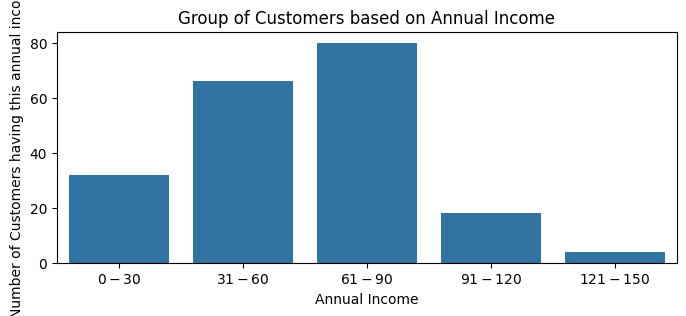

In [23]:
plt.figure(figsize=(8,3))
sns.barplot(x=x,y=y)
plt.title("Group of Customers based on Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers having this annual income")
plt.show()

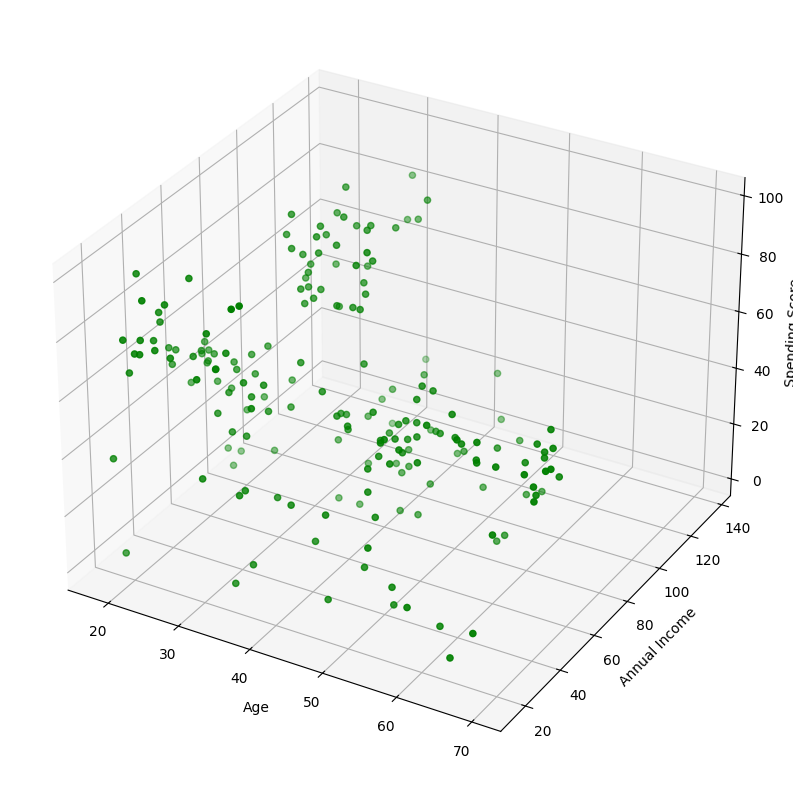

In [26]:
#We are creating clusters based on "Age","Spending Score","Annual Income" - so we need 3d axes to visualize the clusters
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.Age,df["Annual Income (k$)"],df["Spending Score (1-100)"],c='green')
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel("Spending Score")
plt.show()

In [27]:
from sklearn.cluster import KMeans

distance=[] #here we will be storing the eucledian distances between the centroids and the datapoints
for k in range(1,11):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(df.iloc[:,1:]) #only columns from index position 1 onwards (from Age onwards)
  distance.append(kmeans.inertia_)

In [28]:
distance

[308812.7800000001,
 212840.16982097193,
 143342.75157170597,
 109997.0887226427,
 82608.63809385581,
 68421.69719382068,
 54573.12429108358,
 48481.55725955079,
 41217.719368292055,
 39959.26232593066]

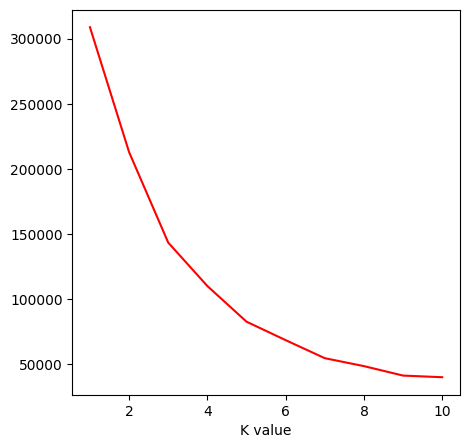

In [31]:
#creating the elbow graph to determine the optimal value of 'k'
plt.figure(figsize=(5,5))
plt.plot(range(1,11),distance,color="red")
plt.xlabel("K value")
plt.show()

In [38]:
#by considering the graph above, k=8 because after 8, the accuracy will become static
km=KMeans(n_clusters=8)
clusters=km.fit_predict(df.iloc[:,1:]) #all the records and columns from 'Age' onwards

df['label']=clusters

In [39]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,0
1,Male,21,15,81,3
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,0
